In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore") 



In [54]:
df = pd.read_csv('haberman.csv')

In [55]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [56]:
df.shape

(306, 4)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## Analysis of data 

<h3>Size of data</h3>

Here total number of columns are 4 and total number of rows ara 306

Columns are = 'age','year','nodes','status

all columns are integer and no null value is present in dataset

In [58]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<h4>Stastical Information</h4>

1. Here mean of Age,year and Status are approximately equal to 50% so we can say data is normally distributed in bell curve but we will visualize later
2. Here nodes contains nearly 1/4th value as 0 

In [59]:
d = df.groupby('status')

In [60]:
for status,status_df in d:
    print(status)
    print(status_df)

1
     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
298   73    68      0       1
300   74    63      0       1
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1

[225 rows x 4 columns]
2
     age  year  nodes  status
7     34    59      0       2
8     34    66      9       2
24    38    69     21       2
34    39    66      0       2
43    41    60     23       2
..   ...   ...    ...     ...
286   70    58      4       2
293   72    63      0       2
299   74    65      3       2
304   78    65      1       2
305   83    58      2       2

[81 rows x 4 columns]


In [61]:
d.max()

,age,year,nodes
status,,,
1,77,69,46
2,83,69,52


<h5>
    Here number of records with status 1 are more than number of records with status 2 i.e.  almost thrice 
</h5>

### Visualization  

##### Countplot 

<AxesSubplot:xlabel='status', ylabel='count'>

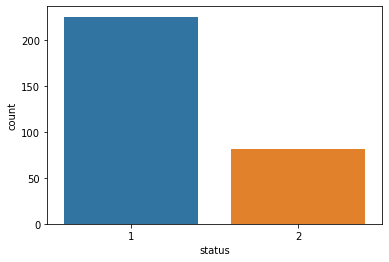

In [62]:
sns.countplot(df['status'])

By plotting using counterplot we can say that Data set in imbalenced 

##### Pairplot 

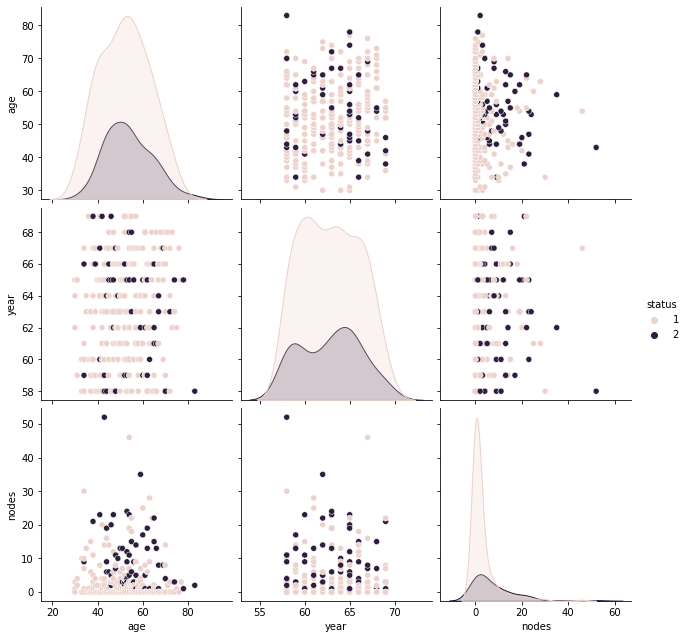

In [63]:
sns.pairplot(df,hue='status',size=3)

Data boundries are not separable by Pairplot

#####  Histogram

<AxesSubplot:xlabel='age', ylabel='Density'>

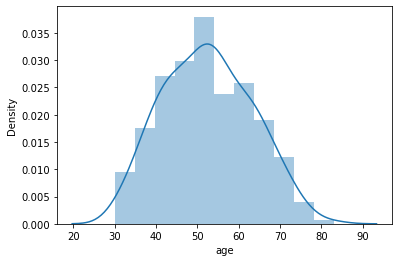

In [64]:
sns.distplot(df['age'])

<h5>Summary about Age Column
</h5> 

1. Age column is approximately normally distributed which follows bell curve
2. Most of the people are in between age 33 to 73


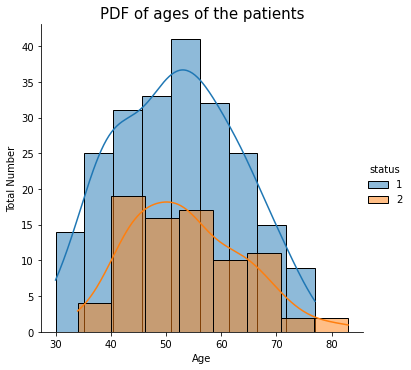

In [65]:
sns.FacetGrid(df, hue ="status", height = 5)\
    .map(sns.histplot, "age", kde = True) \
    .add_legend()

plt.xlabel('Age')
plt.ylabel('Total Number')

plt.title('PDF of ages of the patients', size = 15)

plt.show();

<h5>Summary about Age Column
</h5> 

1. Age column is approximately normally distributed which follows bell curve
2. Most of the people are in between age 33 to 75
3. Here Both Survived and not survived follows bell curve distribution
4. Median age is around 51
5. max age is around 80
6. Minimum age is around 30

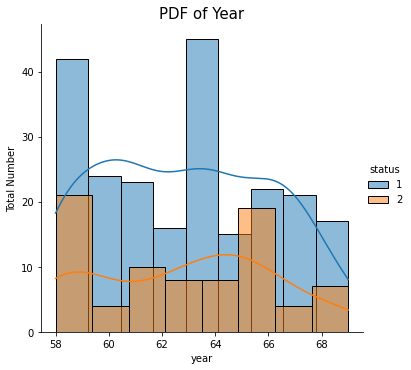

In [66]:
sns.FacetGrid(df, hue ="status", height = 5)\
    .map(sns.histplot, "year", kde = True) \
    .add_legend()

plt.xlabel('year')
plt.ylabel('Total Number')

plt.title('PDF of Year', size = 15)

plt.show();

##### It looks like PDF of  year is not providing us any information

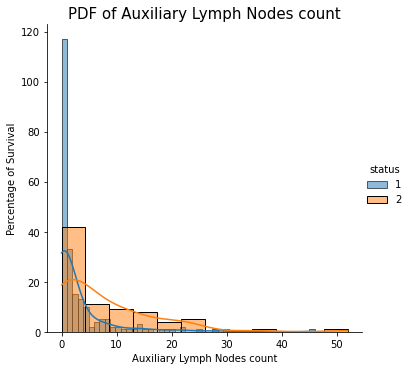

In [67]:
sns.FacetGrid(df, hue ="status", height = 5)\
    .map(sns.histplot, "nodes", kde = True) \
    .add_legend()

plt.xlabel('Auxiliary Lymph Nodes count')
plt.ylabel('Percentage of Survival')

plt.title('PDF of Auxiliary Lymph Nodes count', size = 15)

plt.show();

<h5>Summary about Nodes Count Column
</h5> 

1. Almost 25% values are zero
2. If the number of nodes is 0 then patient survives more
3. If the number of nodes is less than or equal to 3 the patient has a high chance of survival 


### CDF 

In [68]:
df_survived = df.loc[df["status"] == 1];
df_unsurvived = df.loc[df["status"] == 2];

In [69]:
import numpy as np

[0.06222222 0.14222222 0.15555556 0.18222222 0.19555556 0.14222222
 0.08       0.04      ]
[30.    35.875 41.75  47.625 53.5   59.375 65.25  71.125 77.   ]


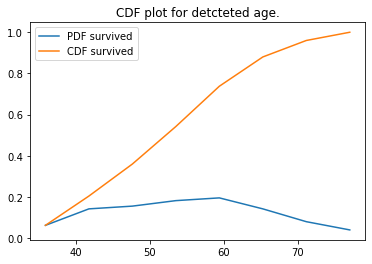

In [70]:
counts, bin_edges = np.histogram(df_survived['age'], bins=8, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title("CDF plot for detcteted age.")
plt.plot(bin_edges[1:],pdf,label="PDF survived")
plt.plot(bin_edges[1:], cdf,label="CDF survived")
plt.legend() 

[0.04938272 0.2345679  0.19753086 0.20987654 0.12345679 0.13580247
 0.02469136 0.02469136]
[34.    40.125 46.25  52.375 58.5   64.625 70.75  76.875 83.   ]


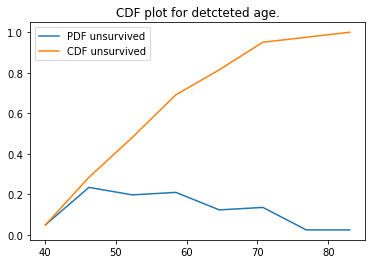

In [71]:
counts, bin_edges = np.histogram(df_unsurvived['age'], bins=8, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title("CDF plot for detcteted age.")
plt.plot(bin_edges[1:],pdf,label="PDF unsurvived")
plt.plot(bin_edges[1:], cdf,label="CDF unsurvived")
plt.legend()

<h5>Summary about CDF
</h5> 

1. Person with age around 45 has highest chances of unsurvival


### Boxplot 

<AxesSubplot:xlabel='age'>

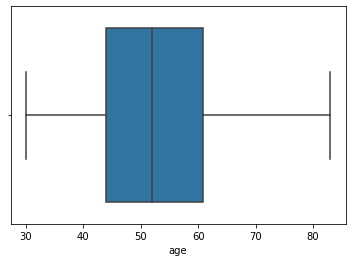

In [72]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='status', ylabel='age'>

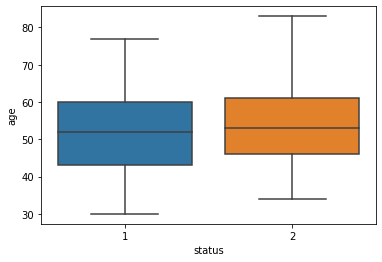

In [73]:
sns.boxplot(x = 'status',y='age',data=df)

<h5>summary from boxplot of age</h5>

1. Here median age  is around 52 
2. No Outliers are present
3. Here Age for Unsurvival is slightly greater than age for survival hence we can say more older people are not survived


<AxesSubplot:xlabel='year'>

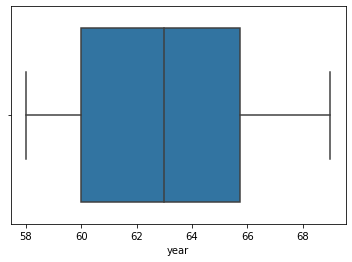

In [74]:
sns.boxplot(df['year'])

<AxesSubplot:xlabel='status', ylabel='year'>

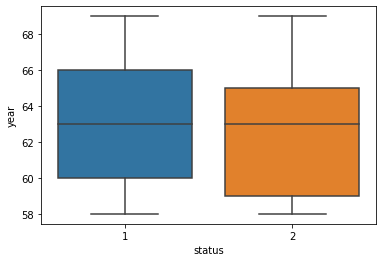

In [75]:
sns.boxplot(x = 'status',y='year',data=df)

<h5>summary from boxplot of Year</h5>

1. Here median age  is around 63 
2. No Outliers are present
3. Here Year for survival is slightly greater than Year for unsurvival like person treated after 1965 has greater chance of survival and person treated before 1960 have less chance of survival



<AxesSubplot:xlabel='nodes'>

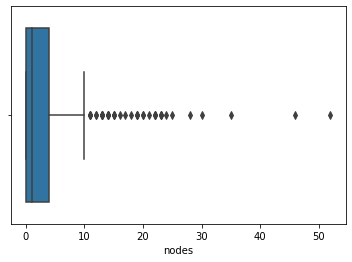

In [76]:
sns.boxplot(df['nodes'])

<AxesSubplot:xlabel='status', ylabel='nodes'>

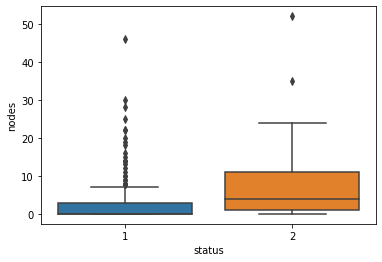

In [77]:
sns.boxplot(x = 'status',y='nodes',data=df)

<h5>summary from boxplot of Nodes</h5>

1. Here median age  is around 0.2 
2. Outliers are present 
3. if number of nodes are less that 2 or 3 then chances of survival are better

#### violin plot 

<AxesSubplot:xlabel='status', ylabel='age'>

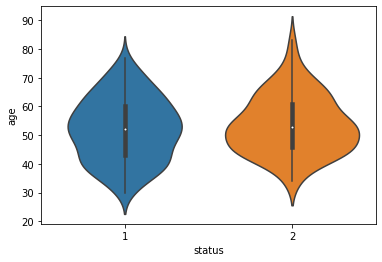

In [78]:
sns.violinplot(x='status', y='age',data=df)

<AxesSubplot:xlabel='status', ylabel='year'>

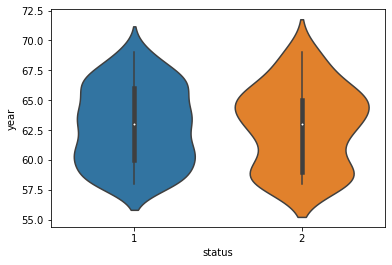

In [79]:
sns.violinplot(x='status', y='year',data=df)

<AxesSubplot:xlabel='status', ylabel='nodes'>

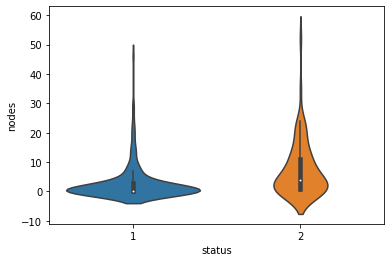

In [80]:
sns.violinplot(x='status', y='nodes',data=df)

<h4>From the above violin charts we can observe that</h4>

1. The deaths peaked for people in their mid 40's and 50's.
2. People who got operated during '59 and '60 have survived more while those who got operated during mid of 1962 to 1965 have seen an exponential rise in deaths.
3. The operations done from mid of 1957 to around 1958 tends to have raise in number of deaths and then the death    rate raised again from mid of 1962 to around 1964
4. A majority of people with 0 and 1 node have survived while few of them died .
5. A mojor portion of the people are in age group mid 40's to their 60's.
6. More the node more chances of unsurvival


#### Summary 
1. No null values are present in dataset. 
2. Dataset is having 306 rows and 4 columns
5. There are some outliers present in Node columns and none in Age and year
6. All columns follow bell shaped curve except Nodes Columns because it is highly centric around zero so its right skewed distribution
7. Data is highly imbalenced because ratio of number of survival to number of unsurvived is approx 3:1
8. Person with more age have less chance of survival
9. Median for age is 52 for year is 63 and for nodes is 0.2
10. With the increase in no:of nodes the survival rate decreased significantly while few people survived even with more number of nodes.
11. I think it is almost impossible to set a treshold for age,year with survival as most of the data overlaps with each other.